<a href="https://colab.research.google.com/github/goyetc/DL_MNIST/blob/master/CG2970_Part2_imperative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applied Deep Learning Homework 1 - Part 2 - Subclassing
* Colin Goyette - cg2970


##Pre-work.. import data, observe shape, etc.

In [0]:
!pip install tf-nightly-2.0-preview

In [0]:
import tensorflow as tf

Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


In [0]:
from __future__ import absolute_import, division, print_function

In [0]:
print("You have version", tf.__version__)
assert tf.__version__ >= "2.0" #TF2.0 req

You have version 2.0.0-dev20190214


In [0]:
import numpy as np

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten

In [0]:
# TensorFlow and tf.keras
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-dev20190214


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

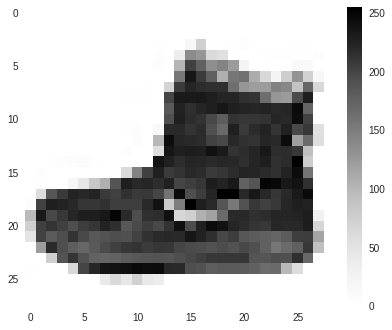

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

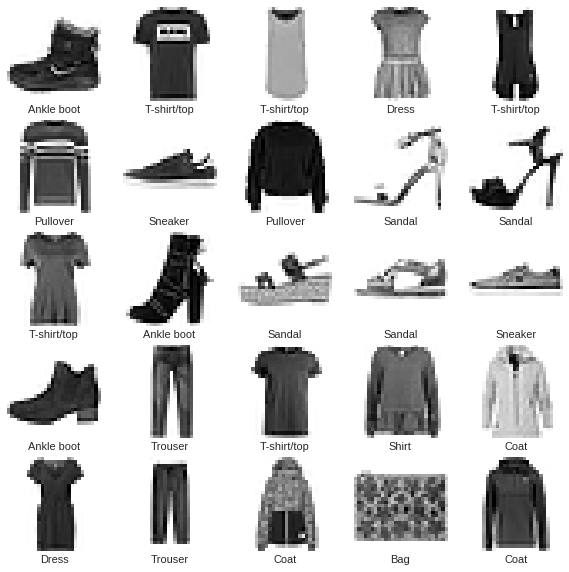

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## P2-5: Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.
* Based on https://github.com/random-forests/applied-dl/blob/master/examples/2.2-hello-subclassing.ipynb

In [0]:
BATCH_SIZE = 128
BUFFER_SIZE = len(train_images)

mnist_train = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE)


In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    #Note: we eliminate the following layer from the sample/base neural network in the imperative style for a linear classifier
    #self.d1 = Dense(128, activation = 'relu')
    self.d2 = Dense(10, activation = 'softmax')
    
  def call(self, x):
    x = self.flatten(x)
    #x = self.d1(x)
    return self.d2(x)

model = MyModel()

In [0]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:
def test_step(images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)

In [0]:
#for storing results for accuracy plot. note, I started with "0" to start the plot from the origin, but this skews the scale so much, I omitted in the subsequent plot
train_acc = [0]
test_acc = [0]


In [0]:
EPOCHS = 10

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  
  train_acc.append(train_accuracy_metric.result() * 100)
  
  test_acc.append(test_accuracy_metric.result() * 100)
  
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))
  

Epoch 1, Loss: 0.7403, Accuracy: 75.75, Test loss: 0.5792, Test accuracy: 79.91
Epoch 2, Loss: 0.6275, Accuracy: 79.25, Test loss: 0.5500, Test accuracy: 80.90
Epoch 3, Loss: 0.5761, Accuracy: 80.83, Test loss: 0.5321, Test accuracy: 81.52
Epoch 4, Loss: 0.5450, Accuracy: 81.80, Test loss: 0.5197, Test accuracy: 81.95
Epoch 5, Loss: 0.5235, Accuracy: 82.47, Test loss: 0.5105, Test accuracy: 82.24
Epoch 6, Loss: 0.5076, Accuracy: 82.96, Test loss: 0.5034, Test accuracy: 82.47
Epoch 7, Loss: 0.4951, Accuracy: 83.34, Test loss: 0.4977, Test accuracy: 82.65
Epoch 8, Loss: 0.4850, Accuracy: 83.65, Test loss: 0.4930, Test accuracy: 82.81
Epoch 9, Loss: 0.4766, Accuracy: 83.90, Test loss: 0.4891, Test accuracy: 82.94
Epoch 10, Loss: 0.4695, Accuracy: 84.12, Test loss: 0.4858, Test accuracy: 83.05


*Note that it is prettty odd we are getting better accuracy to start on the test set.. pure luck? Seems to be the only explanation

*Also worth noting that the accuracy achieved using this approach to a linear model is very similar to that of the sequential method

In [0]:
#debug
#print(train_acc), print(test_acc)

### Accuracy of train/validation set for linear classifier in subclassing style

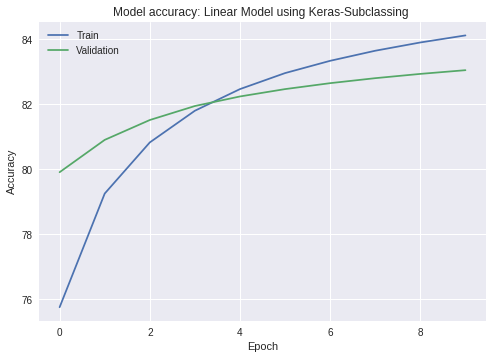

In [0]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(train_acc[1:])
plt.plot(test_acc[1:])
plt.title('Model accuracy: Linear Model using Keras-Subclassing ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Note: Epoch "0" is actually Epoch 1.. there's no streamlined way in matplotlib to adjust the axis w/o altering formatting in a negative manner

##P2-6 Deep Network
* Experimented with several additional dense layers
* Decent accuracy improvement over linear model, and beats approach used in teh sequential section of this assignment that I based on an online tutorial (cited)

In [0]:
BATCH_SIZE = 128
BUFFER_SIZE = len(train_images)

mnist_train = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE)


In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(256, activation = 'relu')
    self.d2 = Dense(128, activation = 'relu')
    self.d3 = Dense(64, activation = 'relu')
    self.d4 = Dense(10, activation = 'softmax')
    
  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    return self.d4(x)

model = MyModel()

In [0]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:
def test_step(images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)

In [0]:
EPOCHS = 10

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))

Epoch 1, Loss: 0.5265, Accuracy: 81.39, Test loss: 0.3806, Test accuracy: 87.50
Epoch 2, Loss: 0.4512, Accuracy: 83.85, Test loss: 0.3475, Test accuracy: 87.50
Epoch 3, Loss: 0.4123, Accuracy: 85.16, Test loss: 0.3253, Test accuracy: 87.50
Epoch 4, Loss: 0.3861, Accuracy: 86.04, Test loss: 0.3057, Test accuracy: 89.06
Epoch 5, Loss: 0.3662, Accuracy: 86.71, Test loss: 0.2919, Test accuracy: 90.00
Epoch 6, Loss: 0.3502, Accuracy: 87.24, Test loss: 0.2864, Test accuracy: 90.62
Epoch 7, Loss: 0.3369, Accuracy: 87.70, Test loss: 0.2769, Test accuracy: 91.07
Epoch 8, Loss: 0.3254, Accuracy: 88.08, Test loss: 0.2631, Test accuracy: 91.41
Epoch 9, Loss: 0.3152, Accuracy: 88.43, Test loss: 0.2524, Test accuracy: 91.67
Epoch 10, Loss: 0.3063, Accuracy: 88.74, Test loss: 0.2462, Test accuracy: 91.88


#### It remains very odd to me that our test accuracy remains better than training.. also appears we could continue to train this model for more epochs, as the test/validation accuracy continues to improve near the final epoch
* One final note: what is the possible significance (or weirdness??) of the test/validation accuracy being exactly the same for the first three epochs?